# PyTorch Tutorial: 01 Tensors
## Overview
In this series of tutorials, we will introduce some basics of PyTorch. Pay attention that the API's of any library will be subject to changes, therefore it is very important to check the offcial documentation before proceeding. 

We will cover the following materials in this tutorial. 
1. Creating tensors.
2. Some common manipulations (including broadcast and einsum).

## Creating tensors

In [1]:
import torch

In [3]:
my_tensor = torch.tensor([[0.0, 1.0],[0.1, 0.2]])#默认变成float32的形式
my_tensor

tensor([[0.0000, 1.0000],
        [0.1000, 0.2000]])

In [4]:
new_tensor= my_tensor.int().float()
new_tensor

tensor([[0., 1.],
        [0., 0.]])

In [5]:
import numpy as np
np_tensor = np.array([[0.1,1.0],[1.0,0.2]])

In [6]:
tensor_from_np = torch.tensor(np_tensor)#numpy默认的浮点数是64位双精度浮点数，GPU下希望使用单精度
tensor_from_np

tensor([[0.1000, 1.0000],
        [1.0000, 0.2000]], dtype=torch.float64)

In [7]:
to_numpy = tensor_from_np.numpy()
to_numpy

array([[0.1, 1. ],
       [1. , 0.2]])

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
my_tensor.to(device=device) # See https://pytorch.org/docs/stable/notes/cuda.html for complete examples

tensor([[0.0000, 1.0000],
        [0.1000, 0.2000]])

In [8]:
to_numpy = my_tensor.numpy()
to_numpy

array([[0. , 1. ],
       [0.1, 0.2]], dtype=float32)

In [9]:
single_number = torch.tensor([0])
single_number

tensor([0])

In [10]:
single_number.item()

0

In [11]:
tensor_with_gradient = torch.tensor([[0.1,1.0], [1.0, 2.0]], requires_grad=True)#tensor经过一定运算后再调用.backward时，会把对应tensor的梯度记录下来，
#需要梯度时，就可以获得
result =tensor_with_gradient.pow(2).sum()
result.backward()
tensor_with_gradient.grad

tensor([[0.2000, 2.0000],
        [2.0000, 4.0000]])

In [12]:
tensor_with_gradient.detach_() # This will make sure that the Tensor will never need gradient
#equivalence : tensor_with_gradient=tensor_with_gradient.detach()

tensor([[0.1000, 1.0000],
        [1.0000, 2.0000]])

## Basic Operations

In [13]:
x = torch.tensor([[0.1, 1.0],[2.0, 1.0]])
x + 1

tensor([[1.1000, 2.0000],
        [3.0000, 2.0000]])

In [14]:
x * 2

tensor([[0.2000, 2.0000],
        [4.0000, 2.0000]])

In [15]:
y = torch.tensor([[0.1, 2.0], [2.0, 3.0]])
x + y 

tensor([[0.2000, 3.0000],
        [4.0000, 4.0000]])

In [16]:
x[:,:]

tensor([[0.1000, 1.0000],
        [2.0000, 1.0000]])

In [17]:
x[1,:]

tensor([2., 1.])

In [18]:
x[:,1]

tensor([1., 1.])

In [19]:
x = x.unsqueeze(0)

In [20]:
x

tensor([[[0.1000, 1.0000],
         [2.0000, 1.0000]]])

In [21]:
x.shape

torch.Size([1, 2, 2])

In [22]:
z = x + y #广播机制：一个batch（权重），多个观测（输入）——10*10与16*10*1——解决方案：①改变w，麻烦②每个batch操作一样，希望有一个复制操作——pytorch broadcast
z # This is a case of broadcast, see https://pytorch.org/docs/stable/notes/broadcasting.html for details

tensor([[[0.2000, 3.0000],
         [4.0000, 4.0000]]])

In [23]:
z.shape

torch.Size([1, 2, 2])

In [24]:
z = z.squeeze()
z


tensor([[0.2000, 3.0000],
        [4.0000, 4.0000]])

In [25]:
x = torch.randn(5)
y = torch.randn(5)
torch.einsum('i,j->ij', x, y) 

tensor([[ 0.3607, -0.3916, -0.0447,  0.3565, -0.5140],
        [-1.8564,  2.0156,  0.2303, -1.8347,  2.6453],
        [ 1.9548, -2.1224, -0.2425,  1.9319, -2.7855],
        [ 0.5001, -0.5430, -0.0620,  0.4943, -0.7126],
        [ 1.5256, -1.6564, -0.1892,  1.5077, -2.1738]])

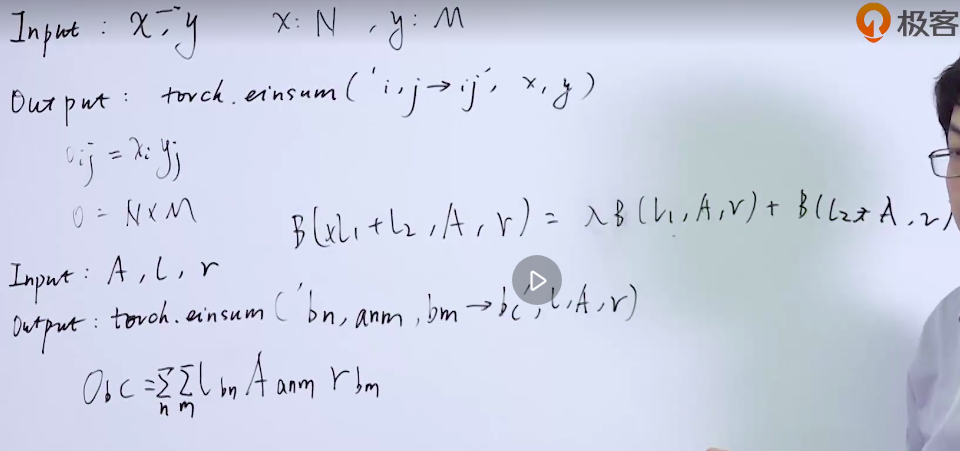

In [26]:
A = torch.randn(3,5,4)
l = torch.randn(2,5)
r = torch.randn(2,4)
torch.einsum('bn,anm,bm->ba', l, A, r)

tensor([[ 2.1064,  2.5295, -2.5941],
        [ 0.3449,  4.8723, -0.7790]])